# Support Vector Machines analysis on Iris Flower - Project
### By: Ajibade Abdulquddus
<img src='iris.jpg' /></a>
___
 

We will be analyzing the famous iris data set!

## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Above is a picture of the three different Iris types:

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Importing and Getting the data

**Using seaborn to get the iris data by using:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
iris= sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Exploratory Data Analysis


**Creating a pairplot of the data set and checking the most seperable flower specie:**

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

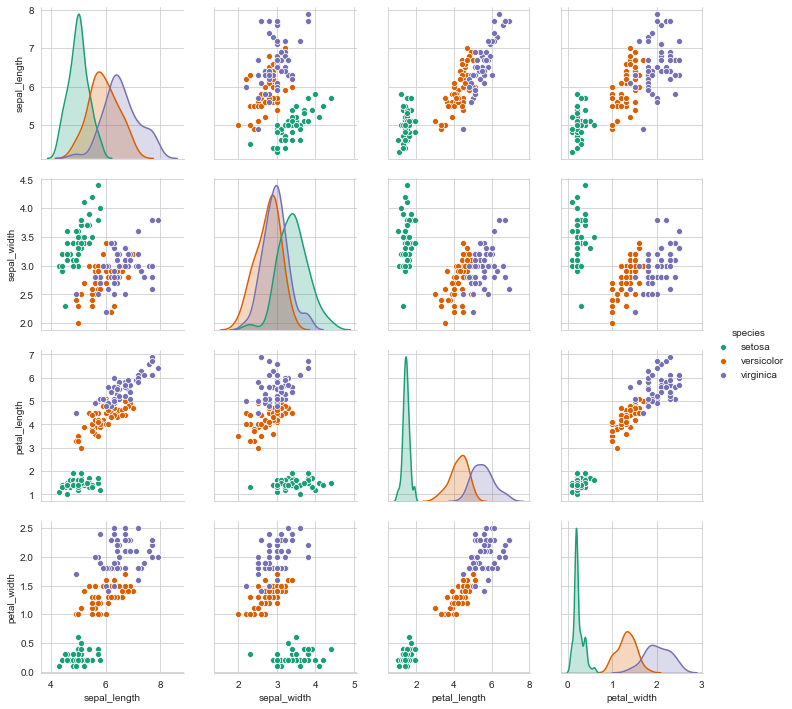

In [10]:
sns.pairplot(iris, hue='species', palette='Dark2' )

#### We can clearly see that the most seperable as appeared on the plot above is the Setosa!

**Creating a kde plot of sepal_length versus sepal width for setosa species of flower:**

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

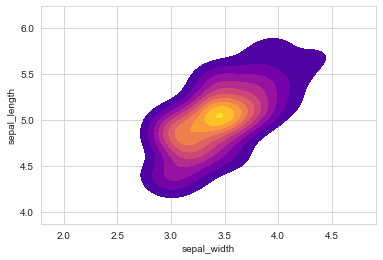

In [11]:
setosa= iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade= True, shade_lowest= False)
#iris[iris['species']=='setosa']

# Train Test Split

**Splitting the data into a training set and a testing set:**

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X= iris.drop('species', axis=1)
y= iris['species']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

# Training a Model

Now its time to train a Support Vector Machine Classifier. 

**Calling the SVC() model from sklearn and fitting the model to the training data:**

In [5]:
from sklearn.svm import SVC

In [6]:
model= SVC()
model.fit(X_train, y_train)

C:\Users\Ajisco\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Evaluation

**Getting predictions from the model and creating a confusion matrix and a classification report:**

In [7]:
predict= model.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predict, y_test))

[[11  0  0]
 [ 0 18  1]
 [ 0  0 15]]


In [9]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The model was pretty good! But let's see if we can tune the parameters to try to get even better.

## Gridsearch

**Importing GridsearchCV from SciKit Learn:**

In [10]:
from sklearn.model_selection import GridSearchCV

**Creating a dictionary called param_grid and fill out some parameters for C and gamma:**

In [11]:
param_grid= {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

**Creating a GridSearchCV object and fitting it to the training data:**

In [12]:
grid= GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

C:\Users\Ajisco\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\Ajisco\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

**Taking that grid model and creating some predictions using the test set and creating classification reports and confusion matrices for them to check for improvements:**

In [13]:
grid_predictions=grid.predict(X_test)

In [14]:
print(confusion_matrix( y_test, grid_predictions))

[[11  0  0]
 [ 0 18  0]
 [ 0  0 16]]


In [15]:
print(classification_report(grid_predictions, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



This is very accurate and perfect!

### The End!

**To drop comments and Follow for more of this:**

GitHub: https://github.com/Ajisco

LinkedIn: https://www.linkedin.com/in/ajibade-abdulquddus-ab5237159

Twitter: https://mobile.twitter.com/Dayo_Ajisco

Instagram: https://www.instagram.com/dayo_ajisco

Phone No./ WhatsApp No.: +2349030987312

